# Proyek Machine Learning Terapan Terakhir - Lalu Habib Satya Wiguna

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

## Domain Knowledge
Langkah pertama yang kita lakukan adalah melihat isi dataset yang akan digunakan serta memahami setiap atribut yang ada pada dataset tersebut. Dataset yang digunakan yaitu [Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks) yang didapaatkan dari situs [kaggle](https://www.kaggle.com)

In [2]:
books = pd.read_csv('dataset/books.csv', error_bad_lines=False, warn_bad_lines=False)
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Dari output di atas kita mempunyai 11123 data dengan 12 kolom pada Goodreads-books dataset. Berdasarkan informasi dari Kaggle, variabel-variabel pada Goodreads-books dataset adalah sebagai berikut:  
- bookID : kode unik dari setiap buku.
- title : nama atau judul dari buku.
- authors : nama dari penulis buku.
- average_rating : rata-rata penilaian dari setiap buku.
- isbn : kode unik buku yang merujuk pada ISBN (International Standard Book Number).
- isbn13 : 13-digit ISBN untuk mengidentifikasi buku.
- language_code : kode bahasa dari buku, misalnya 'eng' untuk English.
- num_pages : jumlah halaman dari buku.
- ratings_count : total penilaian yang didapatkan dari suatu buku.
- text_reviews_count : total teks review yang diperoleh oleh suatu buku.
- publication_date : tanggal buku dirilis ke publik.
- publisher : nama penerbit yang menerbitkan buku.

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Dari output di atas dapat dilihat bahwa:

- Terdapat 6 kolom dengan tipe object, yaitu: title, authors, isbn, language_code, publication_date, publisher.
- Terdapat 5 kolom numerik dengan tipe int64, yaitu: bookID, isbn13, num_pages, ratings_count, text_review_count.
- Terdapat 1 kolom numerik dengan tipe float64, yaitu: average_rating.

In [4]:
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

Dapat dilihat pada output di atas bahwa ada variabel yang penulisannya memiliki spasi di awal yaitu num_pages. Oleh karena itu kita perlu memperbaikinya agar lebih mudah untuk diakses nanti.

In [5]:
# menghapus spasi pada variabel num_pages agar memudahkan pengaksesan variabel nanti

books.columns = books.columns.str.strip()
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [6]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval - dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Data Cleaning
Pada tahap ini, kita akan melakukan pembersihan pada data yaitu dengan menghapus data duplikat (jika ada), melihat data yang bernilai kosong, serta memperbaiki isi pada beberapa kolom agar lebih mudah membaca datanya.

### Checking Null Value
Pada tahap ini kita perlu memastikan apakah ada data dengan nilai kosong pada dataset kita karena akan memiliki pengaruh pada proses pembuatan model rekomendasi nanti jika data kita memiliki informasi yang kurang.

In [7]:
# melihat apakah ada data yang memiliki nilai kosong

books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Dari output di atas kita dapat melihat bahwa seluruh kolom pada dataset kita tidak memiliki nilai kosong atau null value.

### Checking Duplicated Data
Pada tahap ini kita akan memeriksa apakah ada data duplikat pada dataset yang kita gunakan. Jika ada maka kita perlu untuk menghapusnya agar tidak boros informasi serta mengurangi kemungkinan overfitting.

In [8]:
books.duplicated().sum()

0

Tidak ada data duplikat di dalam dataset.

### Fixing the Data
Pada tahap ini kita perlu mengubah isi pada kolom language_code agar memudahkan kita untuk mengetahui bahasa yang digunakan pada suatu buku. Kemudian kita akan menambahkan satu kolom baru di dataset kita yaitu publication_year yang berisi tentang informasi terkait tahun terbit dari suatu buku.

In [9]:
books.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

Dari output di atas dapat dilihat bahwa akan sulit untuk mengetahui bahasa dari suatu buku apabila bentuk datanya seperti di atas. Oleh karena itu kita akan mengubahnya agar menjadi lebih mudah dibaca.

In [10]:
books.language_code.replace(
    to_replace=[
        "eng",
        "en-US",
        "fre",
        "spa",
        "en-GB",
        "mul",
        "grc",
        "enm",
        "en-CA",
        "ger",
        "jpn",
        "ara",
        "nl",
        "zho",
        "lat",
        "por",
        "srp",
        "ita",
        "rus",
        "msa",
        "glg",
        "wel",
        "swe",
        "nor",
        "tur",
        "gla",
        "ale",
    ],
    value=[
        "English",
        "US-English",
        "French",
        "Spanish",
        "British-English",
        "Multiple language",
        "Greek",
        "Middle English",
        "Canada-English",
        "German",
        "Japanese",
        "Arabic",
        "Dutch",
        "Chinese",
        "Latvian",
        "Portuguese",
        "Serbian",
        "Initial Teaching language",
        "Russian",
        "Modern Standard Arabic",
        "Galician",
        "Welsh",
        "Swedish",
        "Murik",
        "Turkish",
        "Gaelic",
        "Afro-Asiatic",
    ],
    inplace=True,
)
books.language_code.unique()

array(['English', 'US-English', 'French', 'Spanish', 'British-English',
       'Multiple language', 'Greek', 'Middle English', 'Canada-English',
       'German', 'Japanese', 'Arabic', 'Dutch', 'Chinese', 'Latvian',
       'Portuguese', 'Serbian', 'Initial Teaching language', 'Russian',
       'Modern Standard Arabic', 'Galician', 'Welsh', 'Swedish', 'Murik',
       'Turkish', 'Gaelic', 'Afro-Asiatic'], dtype=object)

Data pada kolom language_code sekarang menjadi lebih mudah dibaca. Selanjutnya kita akan mengubah nama kolom language_code menjadi language saja karena sudah bukan berbentuk kode lagi.

In [12]:
books = books.rename(columns={'language_code':'language'})

Selanjutnya kita akan menambahkan kolom dengan nama publication_year yang berisi tentang informasi terkait tahun terbit dari suatu buku.

In [14]:
books['publication_year'] = books['publication_date'].apply(lambda x: (int)(str(x[-4:])))

In [15]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004


Dapat dilihat dari output di atas, dataset sekarang menjadi lebih enak untuk dilihat dan lebih mudah dibaca.

## Exploratory Data Analysis
Pada tahap ini, kita akan melakukan ekplorasi terhadap variabel-variabel yang ada pada dataset yang kita gunakan. Pemahaman terhadap variabel ini penting karena akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita.

In [16]:
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'publication_year']

Total of Authors:  4484
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64


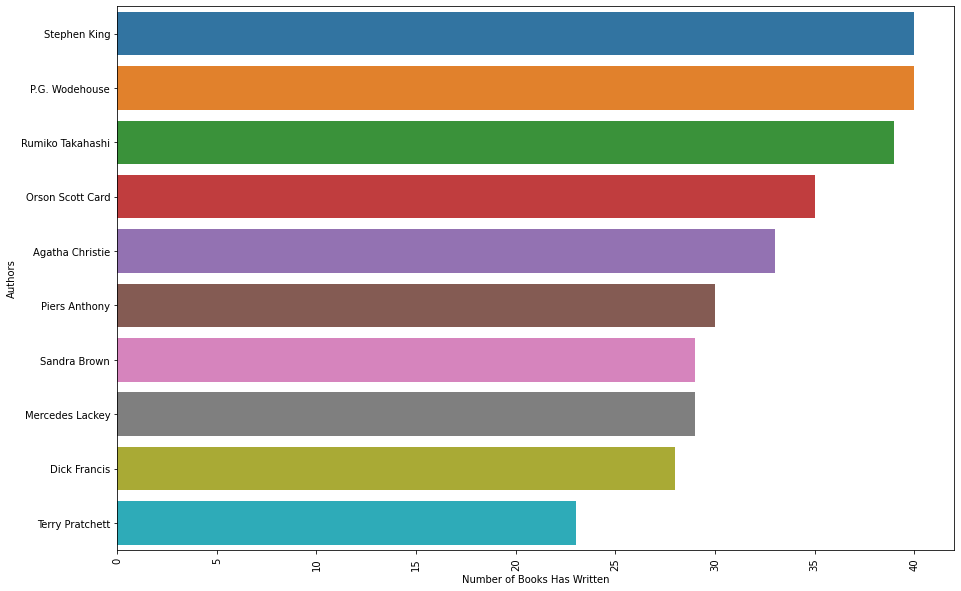

In [27]:
num_of_author = books['authors'].duplicated().sum()
author = books.authors.value_counts()[0:10]
print('Total of Authors: ', num_of_author)
print(author)

plt.figure(figsize=(15, 10))
sns.barplot(x=author, y=author.index)
plt.xticks(rotation=90)
plt.ylabel('Authors')
plt.xlabel('Number of Books Has Written')
plt.show()

Berdasarkan output di atas, dari total 4484 penulis dapat kita lihat Top-10 penulis dengan buku terbanyak yang telah ditulis. Author dengan buku terbanyak yang ditulis adalah Stephen King sebanyak 40 buku. 

Total of Publishers:  8833
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64


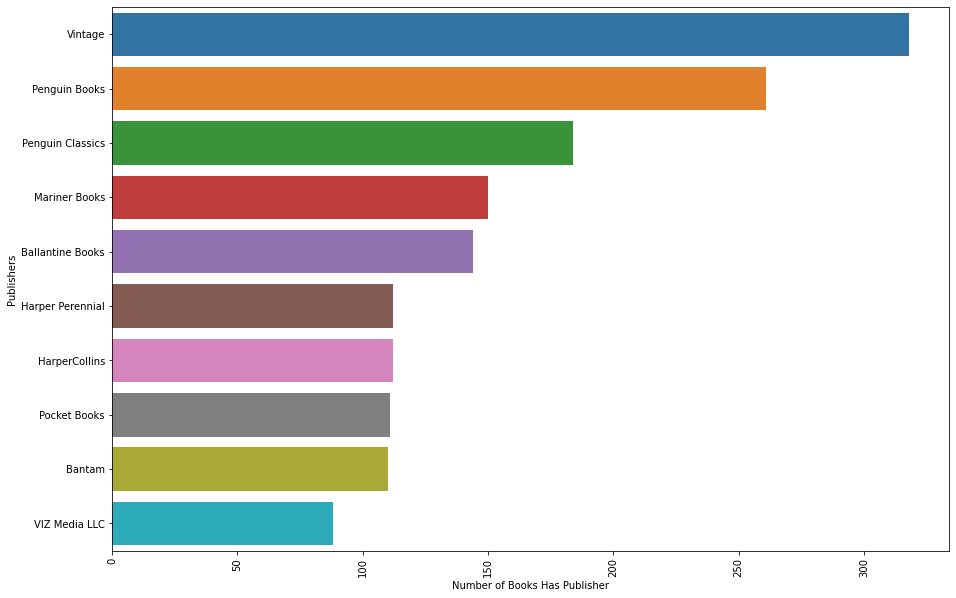

In [30]:
num_of_pub = books['publisher'].duplicated().sum()
publisher = books.publisher.value_counts()[0:10]
print('Total of Publishers: ', num_of_pub)
print(publisher)

plt.figure(figsize=(15,10))
sns.barplot(x=publisher,y=publisher.index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('Number of Books Has Publisher')
plt.show()

Dari output di atas kita dapat melihat Top-10 penerbit dengan buku yang telah diterbitkan dari total 8833 penerbit. Vintage merupakan penerbit yang menerbitkan buku terbanyak dengan total 318 buku yang telah diterbitkan di bawah nama Vintage.

Total of Languages:  27
English              8908
US-English           1408
Spanish               218
British-English       214
French                144
German                 99
Japanese               46
Multiple language      19
Chinese                14
Greek                  11
Name: language, dtype: int64


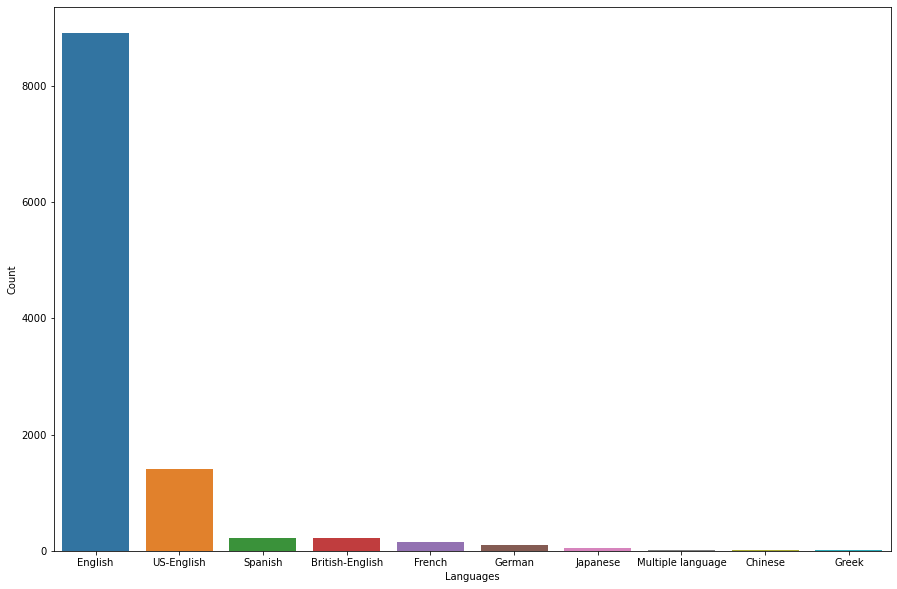

In [43]:
num_of_lang = books['language'].nunique()
languages = books.language.value_counts()[0:10]
print('Total of Languages: ', num_of_lang)
print(languages)

plt.figure(figsize=(15, 10))
sns.barplot(x=languages.index, y=languages)
plt.ylabel('Count')
plt.xlabel('Languages')
plt.show()

Dari total 27 bahasa, Inggris merupakan bahasa yang paling banyak digunakan pada buku yang ada di dataset dengan total 8908 buku yang ditulis dalam bahasa Inggris.

2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
Name: publication_year, dtype: int64


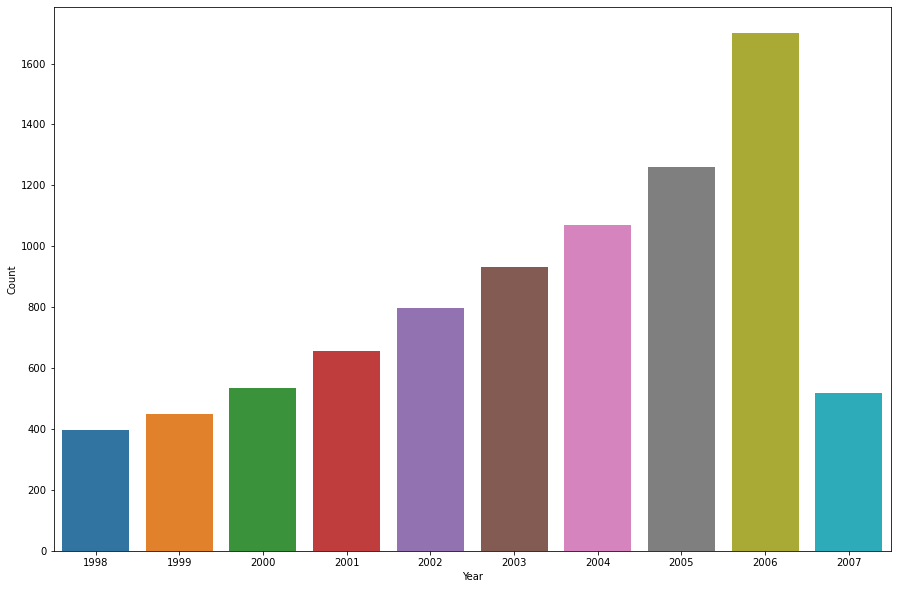

In [42]:
year = books['publication_year'].value_counts()[0:10]
print(year)

plt.figure(figsize=(15,10))
sns.barplot(x=year.index, y=year)
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

Berdasarkan grafik di atas, tahun 2006 merupakan tahun di mana buku paling banyak diterbitkan dengan total 1700 buku yang diterbitkan pada tahun tersebut.

Average Rating of All Books :  3.93


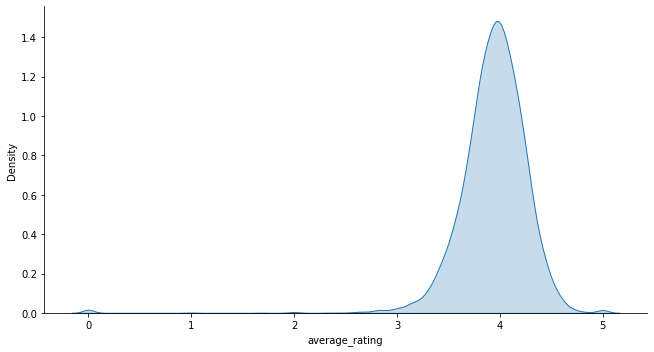

In [63]:
average_rating = round(books['average_rating'].mean(), 2)
print('Average Rating of All Books : ', average_rating)

graph = sns.displot(books, x='average_rating', kind='kde', fill=True);
graph.fig.set_figwidth(10)

Berdasarkan grafik di atas, rata-rata penilaian atau rating yang diberikan untuk semua buku adalah 3.93.

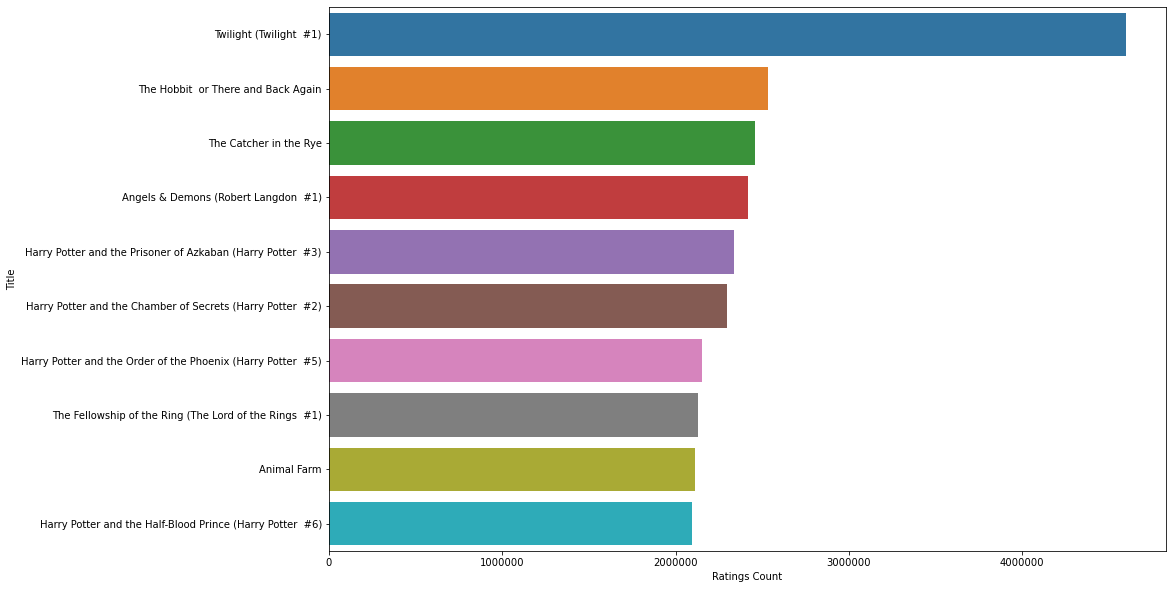

In [85]:
top_10_rating = books[books['ratings_count']>1000000].sort_values(by='ratings_count', ascending=False)[0:10]

plt.figure(figsize=(15,10))
sns.barplot(x=top_10_rating.ratings_count, y=top_10_rating['title'])
plt.ylabel('Title')
plt.xlabel('Ratings Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Berdasarkan grafik di atas, buku dengan judul Twilight menempati posisi teratas untuk buku dengan rating terbanyak yang diberikan.

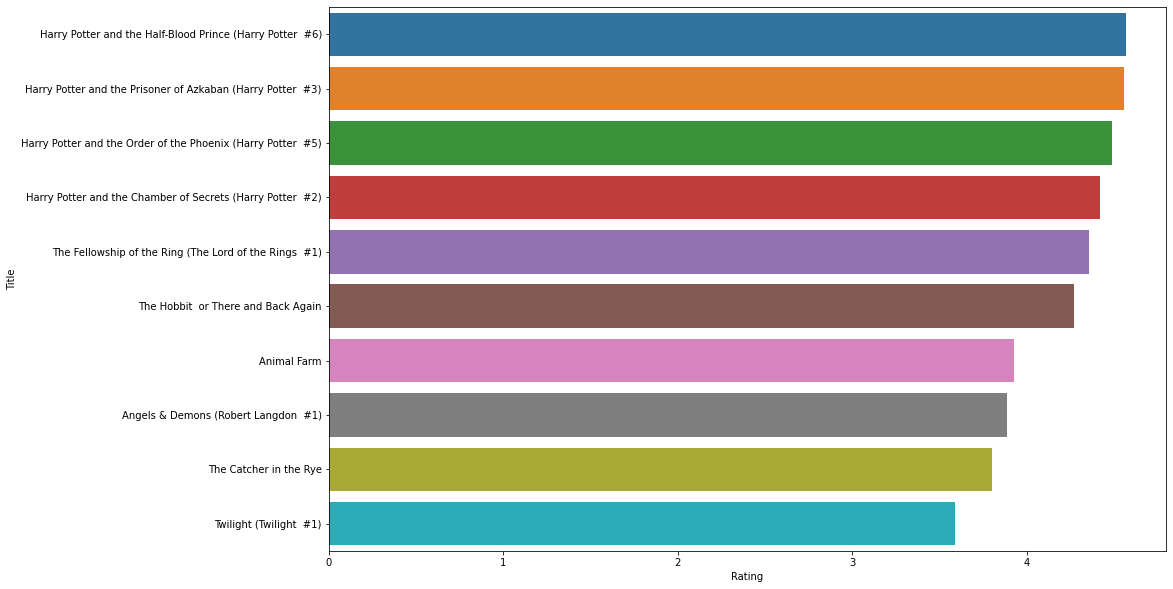

In [88]:
top_10_books = top_10_rating.sort_values(by='average_rating', ascending=False)[0:10]

plt.figure(figsize=(15,10))
sns.barplot(x=top_10_books.average_rating, y=top_10_books['title'])
plt.ylabel('Title')
plt.xlabel('Rating')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Berdasarkan grafik di atas, buku dengan judul Harry Potter and the Half-Blood Prince menempati posisi teratas untuk buku dengan rating tertinggi.

## Data Preparation